# Разведывательный анализ данных (EDA)
## Задача
1. Посмотреть на данные.
2. Проверить данные на пустые значения.
3. Проверить данные на дублированные/полностью скоррелированные значения.
4. Проверить данные на наличие выбросов.
5. Отобрать данные, пригодные для дальнейшего построения модели.
6. Снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.

## Первичная обработка данных.
Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл и рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [88]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud_math.dtypes.value_counts()

object     17
float64    12
int64       1
dtype: int64

### Общая информация
Как мы видим исходный файл содержит 30 столбцов, 13 из которых заполнены количественными переменными, остальные номинативными, в целом в столбцах содержится 395 срок. Есть пропущенные значения.

In [90]:
# Переименуем странное название столбца studytime, granular
stud_math.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [5]:
# В датасете представлены следующие столбцы
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### Пропущенные значения
В описание датасета подробно описан тип информации по каждому столбцу. Поэтому просто посчитаем пропущенные значения.
Как видно - пропущенные значения в каждом из столбцов не превышают 10%, что хорошо. Score пропущено 6 значений, в целом это важный параметр и пустые значения нам никак не помогут, поэтому мы ниже их удалим.

Создадим функцию, которая наглядно покажет пропущенные значения по столбцам и в процентах.

In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Вывод таблицы
missing_values_table(stud_math)

Your selected dataframe has 30 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


Пропущенных значений не так много, поэтому удалять данные мы не будем только на основании пропущенных данных. Pstatus больше всего пропущенных значений, вариантов заполнения только А или Т, пока - вывод - пустые значения в номинативных столбцах заполняться не будут, только для удобства заменим NaN None в некоторых столбцах, потому что я не вижу большой разницы.

In [8]:
#строку Pstatus с nan, надо заменить на None для удобства
stud_math.Pstatus = stud_math.Pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
#строку paid с nan, надо заменить на None для удобства
stud_math.paid = stud_math.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [9]:
# для удобства создадим два датафрейма с количественными значениями
stud_num = stud_math.select_dtypes(include = ['float64', 'int64'])
stud_num

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


In [10]:
# и отдельно с номинальными значениями, может пригодиться
stud_object = stud_math.select_dtypes(include = ['object'])
stud_object

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,None,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,None,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


Рассмотрим числовой датасет, score максимальное значение 100, что предполагает оценивание в процентах и нет выбросов. absences - максимальное 385, что больше чем дней в году, - скорее говорит о наличии выбросов. Возраст учеников от 15 до 22 лет - без выбросов. Кроме score и absences - все остальные цифровые параметры содержат не больше 5 уникальных значений, потому что судя по описанию все параметры используют 4-5 бальную шкалу распределения признаков, есть одно отрицательное значение famrel, которого не должно быть и Fedu максимум 40, скорее всего опечатся, т.к. максимум должен быть 4, рассмотрим их ниже в Гистограммах.

In [11]:
stud_num.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### score
Важный параметр для нашего анализа - это оценка успеваемости учеников score, сфокусируемся на нем. График показывает, что в основном успеваемость учеников сосредоточена в интревале от 20 до 100 баллов с пиком меджу 40 и 60 баллов. Также выделяется группа учеников, чья успеваемость 0 (37 записей) - может быть  это ученики, не пришедшие на экзамен, хотя по absences у них 0, т.е. ученики не пропускали занятия, но на экзамен не пришли, что маловероятно, failures - больше всего 0, что говорит ученики учились без внеучебных неудач, причем среди "нулевых" учеников, есть и такие, кто платил за дополнительные занятия. Мое предположение, что ученики пришли на экзамен и получили 0, поэтому оставим эту группу в датасете. Кроме того, ученики которые набрали до 40% будут в группе - Fail учеников, которые не набрали проходной балл - 100 учеников, достаточно много.

In [12]:
# 6 пропущенных данных в столбце score.
stud_math[stud_math['score'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,None,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [13]:
# удалим эти строки из датасета
stud_math.dropna(subset=['score'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


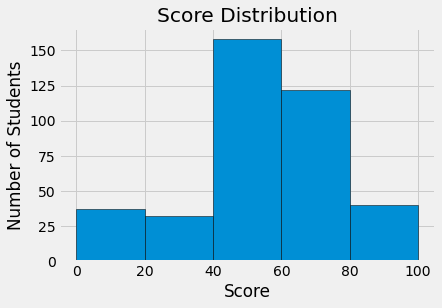

In [14]:
# Гистограмма распределения - score
plt.style.use('fivethirtyeight')
plt.hist(stud_math['score'].dropna(), bins = 5, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Students'); 
plt.title('Score Distribution');

### Failed and Passed dataset
Рассмотрим датасет, где оценка ниже или равна 40, это будут ученики не набравшие проходной балл. 92 учеников из 389 это достаточно много, и датасет, где оченка выше 40.

In [74]:
# датасет, где score <40 из датасета с удаленными столбцами, чтобы не путаться в анализе.
stud_score_fail = stud_math_new.loc[stud_math_new['score'] <= 40]
stud_score_fail

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,famsup,paid,activities,famrel,freetime,goout,health,absences,score
0,F,18,NaN,4.0,4.0,at_home,teacher,course,2.0,2.0,0.0,no,no,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,GT3,1.0,1.0,at_home,other,course,1.0,2.0,0.0,yes,no,no,5.0,3.0,3.0,3.0,4.0,30.0
7,F,17,GT3,4.0,4.0,other,teacher,home,2.0,2.0,0.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
18,M,17,GT3,3.0,2.0,services,services,course,1.0,1.0,3.0,yes,None,yes,5.0,5.0,5.0,5.0,16.0,25.0
25,F,16,GT3,2.0,2.0,services,services,home,1.0,1.0,2.0,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,F,18,GT3,4.0,4.0,teacher,at_home,reputation,3.0,1.0,0.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,F,19,GT3,2.0,3.0,services,other,course,1.0,3.0,1.0,no,no,yes,5.0,4.0,2.0,5.0,0.0,0.0
388,F,18,LE3,3.0,1.0,teacher,services,course,1.0,2.0,0.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,F,18,GT3,1.0,1.0,other,other,course,NaN,2.0,1.0,no,no,yes,1.0,1.0,1.0,5.0,0.0,0.0


In [75]:
stud_score_fail.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,92.000000,90.000000,86.000000,82.000000,92.000000,88.000000,85.000000,91.000000,89.000000,87.000000,92.000000,92.000000
mean,16.945652,2.533333,2.325581,1.463415,1.923913,0.704545,3.905882,3.252747,3.393258,3.689655,4.413043,21.195652
std,1.401445,1.062116,1.100180,0.706148,0.841685,0.972721,0.920966,0.995472,1.173747,1.305715,5.810472,17.625057
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,17.000000,2.500000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,30.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.000000,4.000000,4.000000,5.000000,7.250000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,20.000000,40.000000


In [76]:
# датасет, где score > 40 из датасета с удаленными столбцами, чтобы не путаться в анализе.
stud_score_pass = stud_math_new.loc[stud_math_new['score'] > 40]
stud_score_pass

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,famsup,paid,activities,famrel,freetime,goout,health,absences,score
2,F,15,LE3,1.0,1.0,at_home,other,other,1.0,2.0,3.0,no,None,no,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,GT3,4.0,2.0,health,NaN,home,1.0,3.0,0.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,GT3,3.0,3.0,other,other,home,1.0,2.0,0.0,yes,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
5,M,16,LE3,4.0,3.0,services,other,reputation,1.0,2.0,0.0,yes,yes,yes,5.0,4.0,2.0,5.0,10.0,75.0
6,M,16,LE3,2.0,2.0,other,other,home,1.0,2.0,0.0,no,no,no,4.0,4.0,4.0,3.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,M,17,GT3,2.0,3.0,other,services,NaN,2.0,2.0,0.0,no,no,yes,4.0,4.0,3.0,3.0,2.0,50.0
385,F,18,GT3,2.0,2.0,at_home,other,other,NaN,3.0,0.0,no,yes,no,5.0,3.0,3.0,4.0,2.0,50.0
391,M,17,LE3,3.0,1.0,services,services,course,2.0,1.0,0.0,no,no,no,2.0,4.0,5.0,2.0,3.0,80.0
393,M,18,LE3,3.0,2.0,services,other,course,3.0,1.0,0.0,no,no,NaN,4.0,4.0,1.0,5.0,0.0,50.0


In [77]:
stud_score_pass.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,269.000000,268.000000,252.000000,251.000000,264.000000,254.000000,250.000000,263.000000,265.000000,259.000000,269.000000,269.000000
mean,16.531599,2.832090,2.555556,1.434263,2.090909,0.177165,3.964000,3.243346,2.977358,3.509653,4.676580,62.527881
std,1.192297,1.104034,1.086355,0.708986,0.862876,0.551776,0.915454,0.977662,1.069310,1.417944,4.685984,12.861350
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,45.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,1.000000,50.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,60.000000
75%,17.000000,4.000000,3.250000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


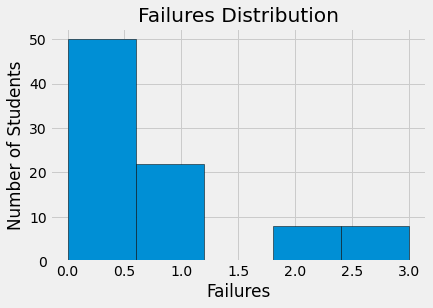

In [78]:
# Гистограмма распределения stud_score_fail - failures
plt.style.use('fivethirtyeight')
plt.hist(stud_score_fail['failures'].dropna(), bins = 5, edgecolor = 'k');
plt.xlabel('Failures'); plt.ylabel('Number of Students'); 
plt.title('Failures Distribution');

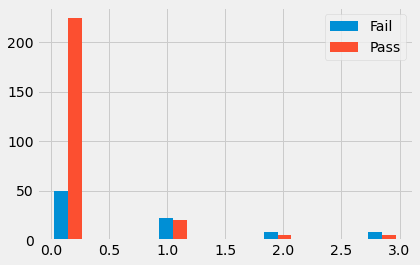

In [80]:
# matplotlib гистрограмма failures stud_score_fail vs failures stud_score_fail 
plt.hist([stud_score_fail.failures, stud_score_pass.failures], label = ("Fail", "Pass"))
plt.legend()

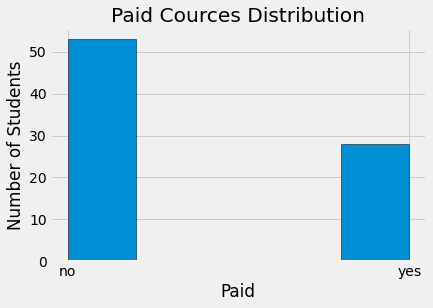

In [81]:
# Гистограмма распределения stud_score_fail - paid
plt.style.use('fivethirtyeight')
plt.hist(stud_score_fail['paid'].dropna(), bins = 5, edgecolor = 'k');
plt.xlabel('Paid'); plt.ylabel('Number of Students'); 
plt.title('Paid Cources Distribution');

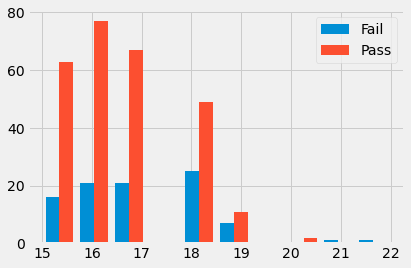

In [82]:
# matplotlib гистрограмма age stud_score_fail vs age stud_score_зфыы  
plt.hist([stud_score_fail.age, stud_score_pass.age], label = ("Fail", "Pass"))
plt.legend()

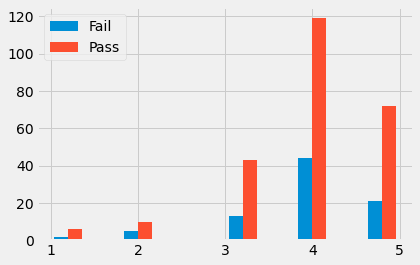

In [83]:
# matplotlib гистрограмма famrel stud_score_fail vs famrel stud_score_зфыы  
plt.hist([stud_score_fail.famrel, stud_score_pass.famrel], label = ("Fail", "Pass"))
plt.legend()

### Гистограммы и выбросы
При помощи гистограмм посмотрим как распределены некоторые числовые значения и наличие выбросов. Продолжим анализ после этого.

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

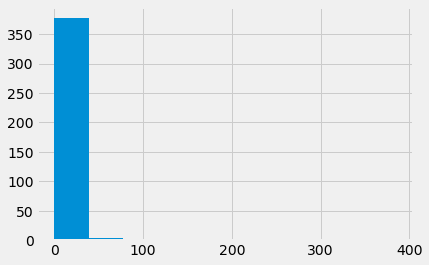

In [24]:
# Гистограмма absences
stud_math.absences.hist()
stud_math.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


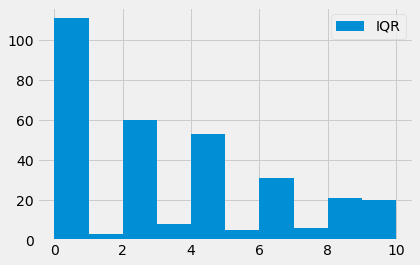

In [25]:
# есть, выбросы, удалим их.
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [26]:
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

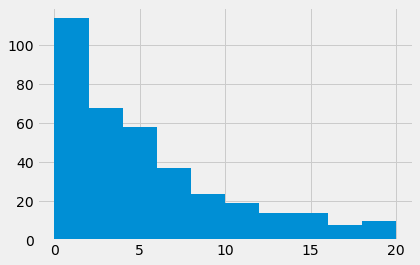

In [27]:
stud_math.absences.hist()
stud_math.absences.describe()

count    343.000000
mean       2.588921
std        2.301181
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

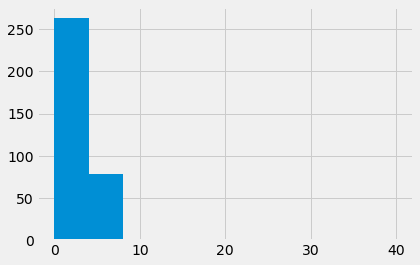

In [28]:
# Гистограмма Fedu
stud_math.Fedu.hist()
stud_math.Fedu.describe()

In [29]:
# выброс, всего одна строка.
stud_math.loc[stud_math['Fedu'] > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,None,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [30]:
# скорее всего это опечатка, поэтому заменим на 4.
stud_math['Fedu'] = stud_math['Fedu'].replace(to_replace = 40, 
                 value = 4)

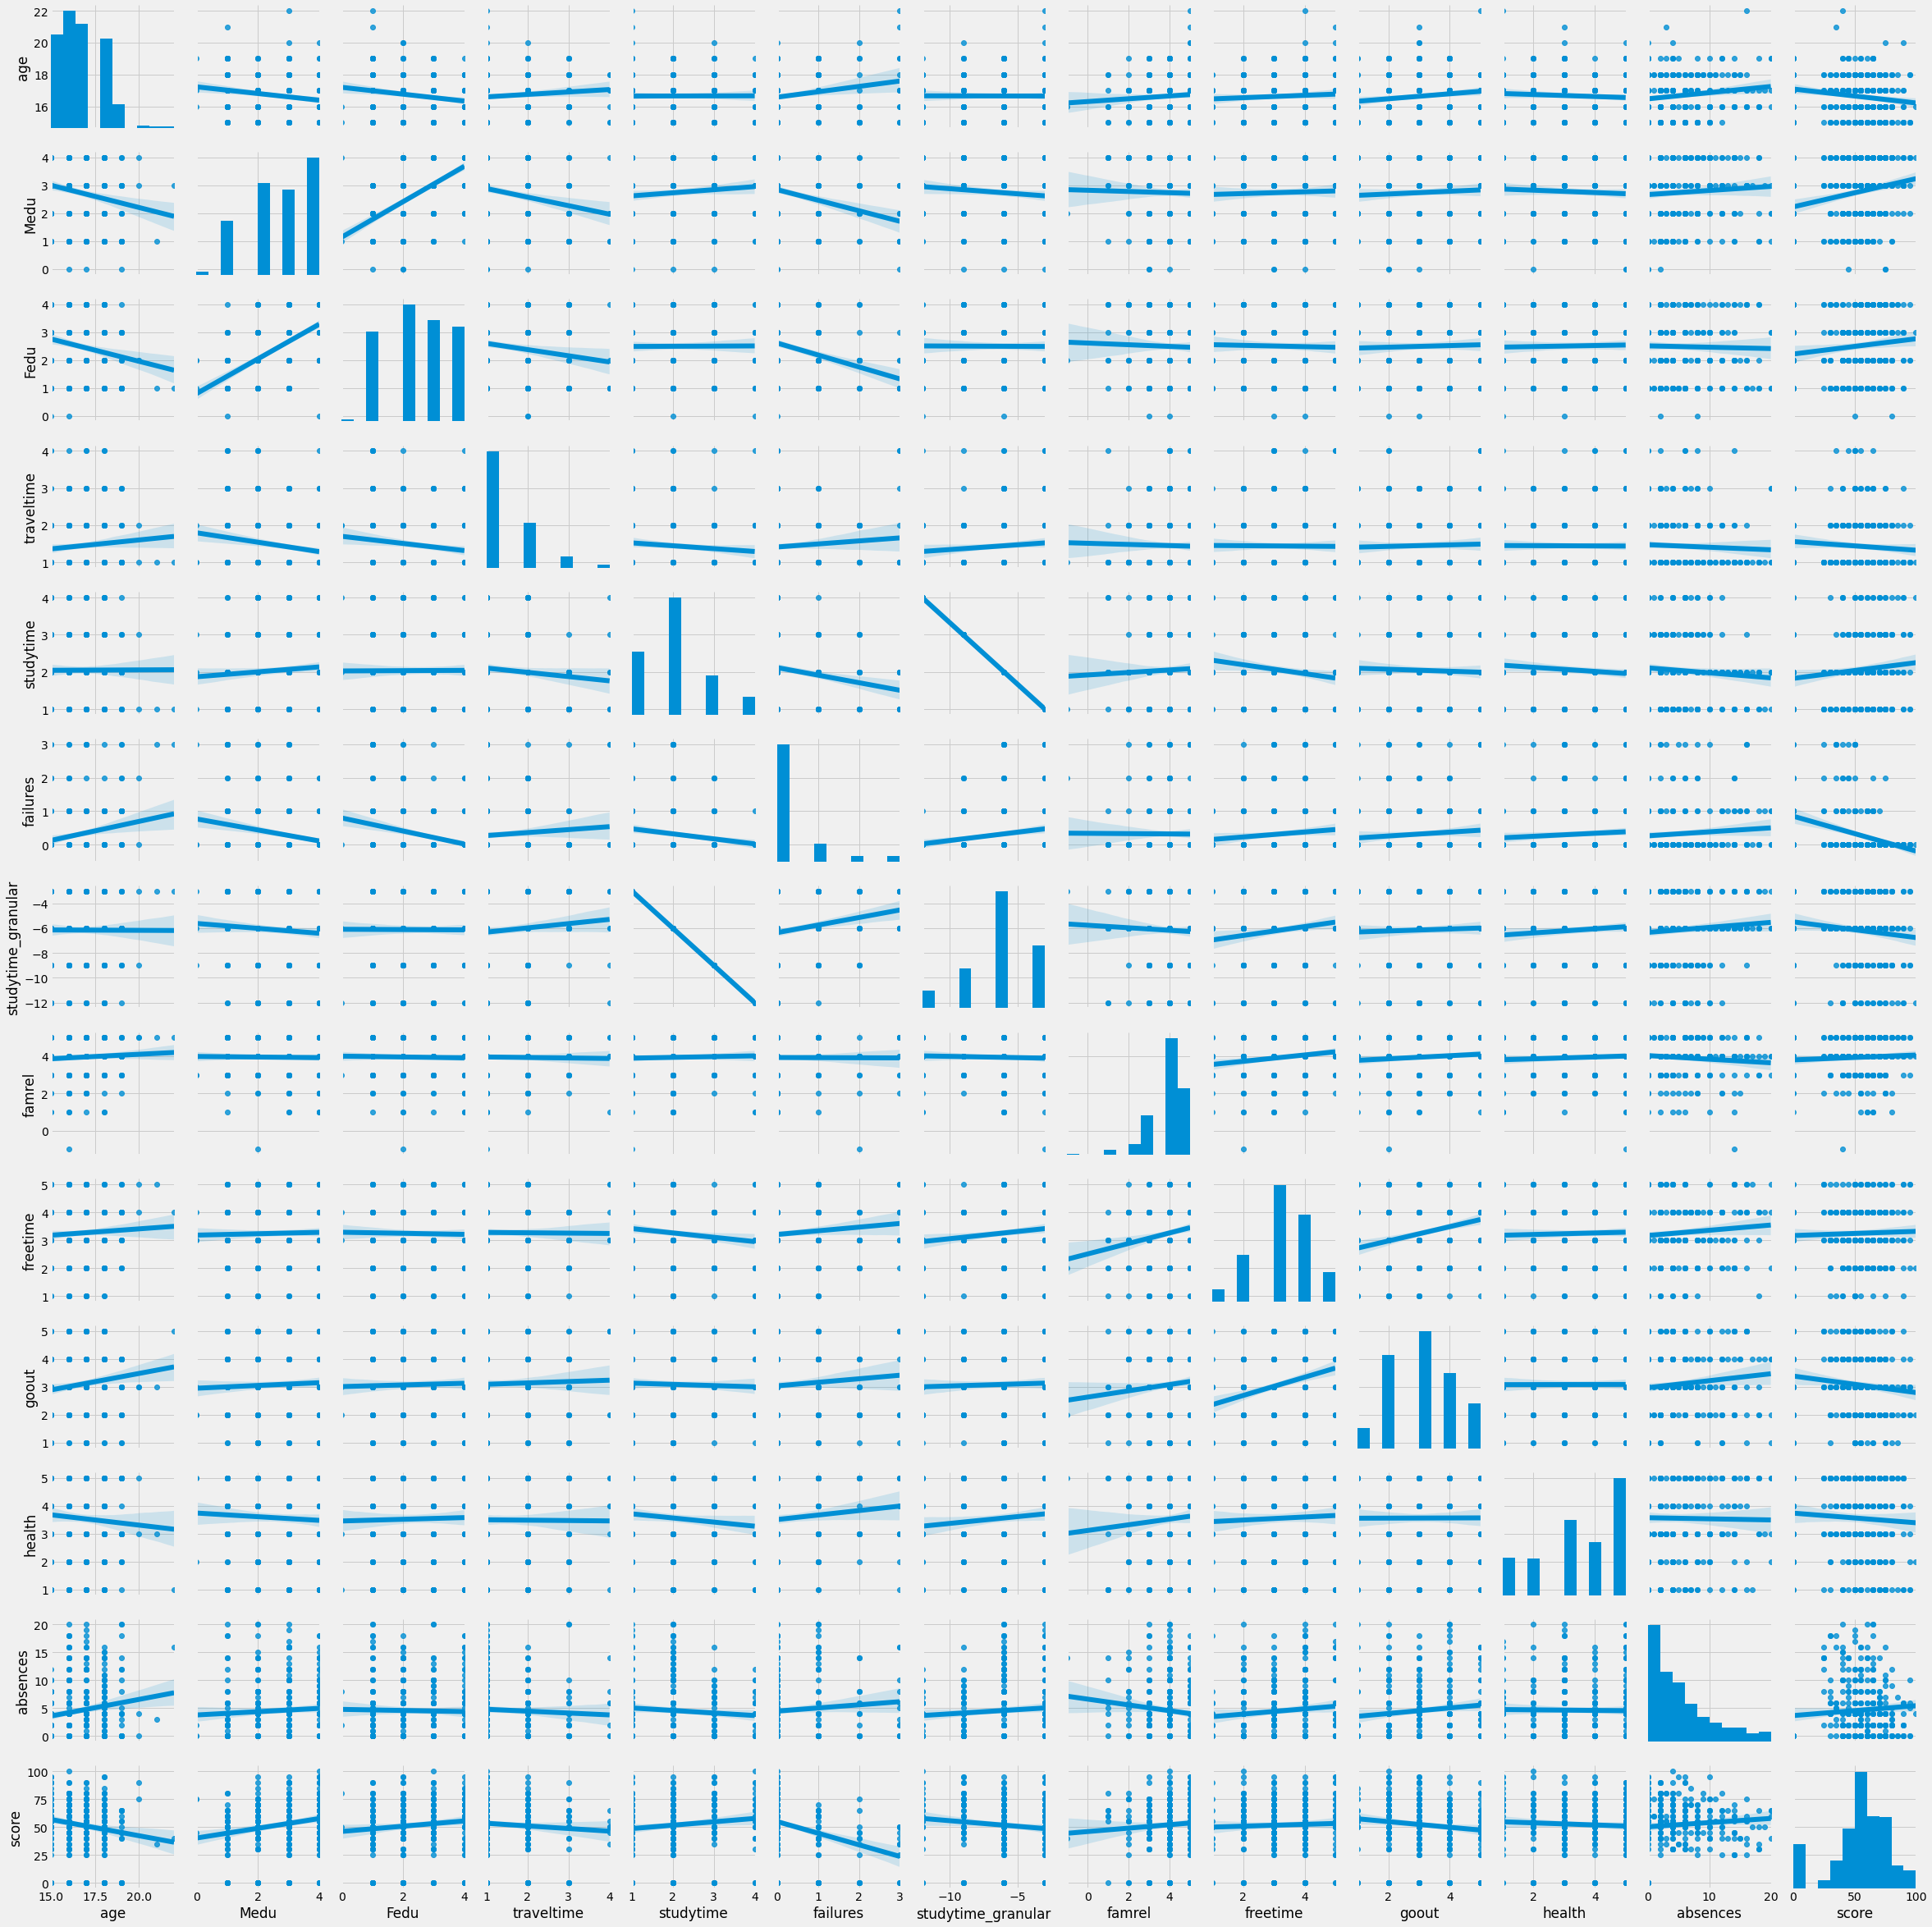

In [31]:
# быстро посмотрим в графиках где есть выбросы и распределение значений воспользовавшись функцией pairplot из модуля seaborn:
sns.pairplot(stud_math, kind = 'reg')

Судя по графикам, только absences и score имеют разные данные, остальные мало.

count    361.000000
mean       2.049861
std        0.854892
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

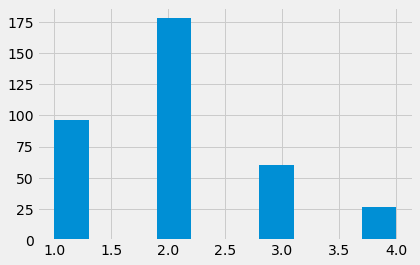

In [32]:
# продолжим смотреть на числовые столбцы в гистограммах - studytime
stud_math.studytime.hist()
stud_math.studytime.describe()

Большинство учеников, занимается по 1-2 часа в день.

In [91]:
# используем для наглядности метод корреляции
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
studytime_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [96]:
# удалим из датасета studytime_granular, т.к. значения имеют какую-то обратную зависимость с studytime
stud_math.drop(['studytime_granular'], inplace = True, axis = 1)

count    338.000000
mean       1.446746
std        0.709289
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

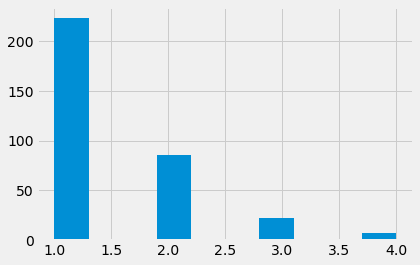

In [35]:
# Гистограмма traveltime
stud_math.traveltime.hist()
stud_math.traveltime.describe()

Ученики в основном живут недалеко от школы, позже рассмотрим как влияет параметр на score.

count    340.000000
mean       3.950000
std        0.937816
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

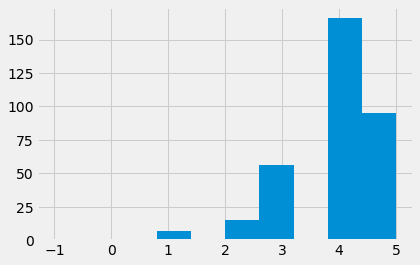

In [36]:
# Гистограмма famrel.
stud_math.famrel.hist()
stud_math.famrel.describe()

In [37]:
# выброс - всего одна строка.
stud_math.loc[stud_math['famrel'] < 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,None,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [38]:
# скорее всего это опечатка, поэтому уберем минус.
stud_math['famrel'] = stud_math['famrel'].replace(to_replace = -1, 
                 value = 1)

count    340.000000
mean       3.955882
std        0.912610
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

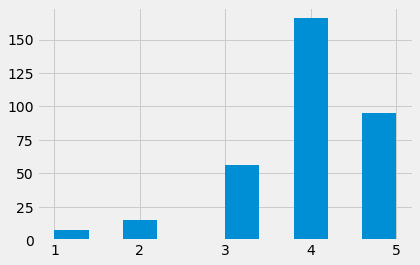

In [39]:
stud_math.famrel.hist()
stud_math.famrel.describe()

Радует, что отношения в семье в основном 4-5, т.е хорошие.
С помощью box-plot или KDE-plot (график показывает плотность распределения переменных) посмотрим номинативные переменные

In [40]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

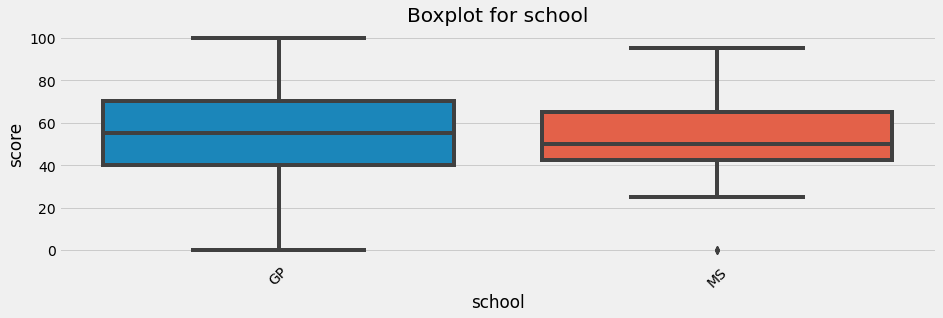

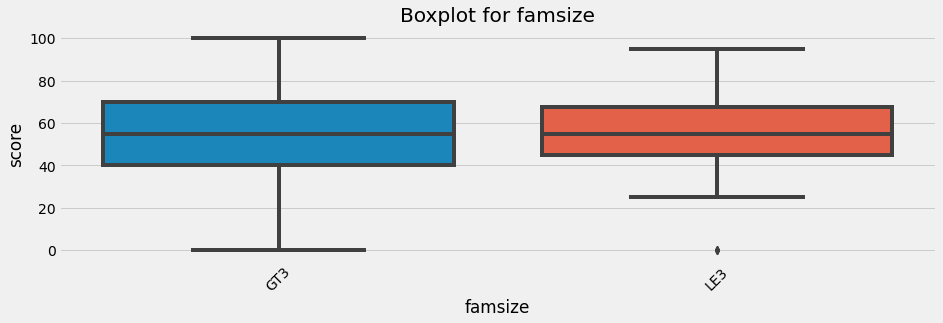

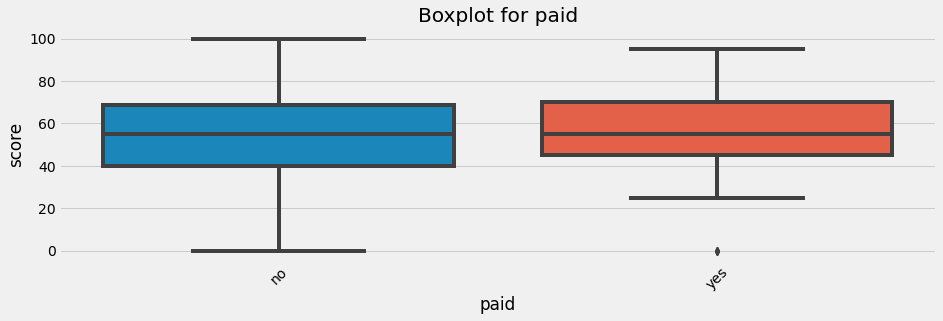

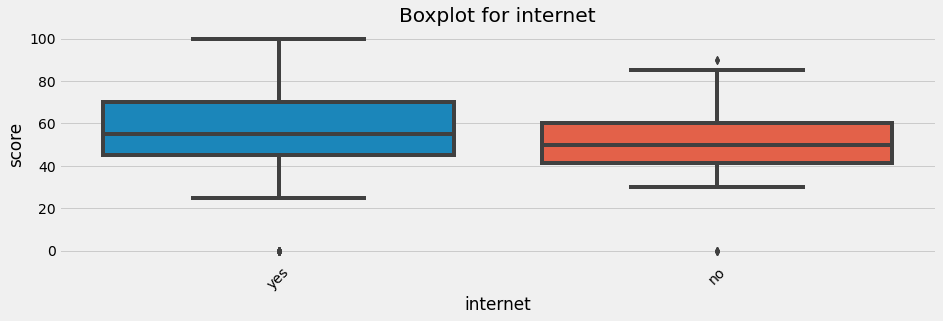

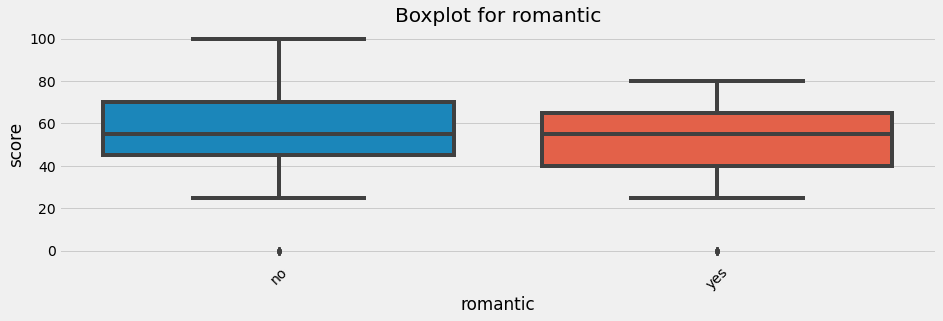

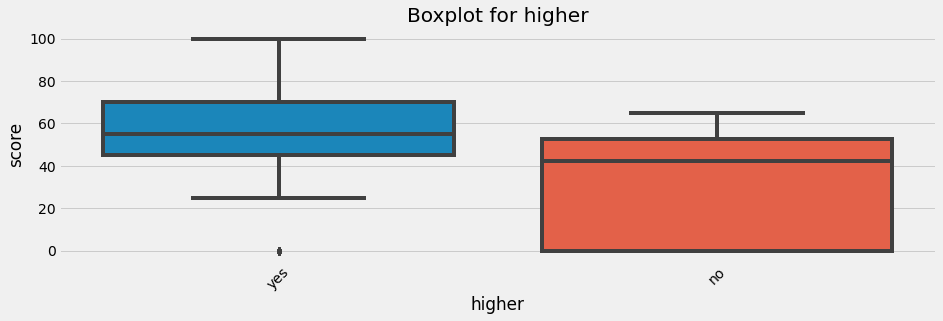

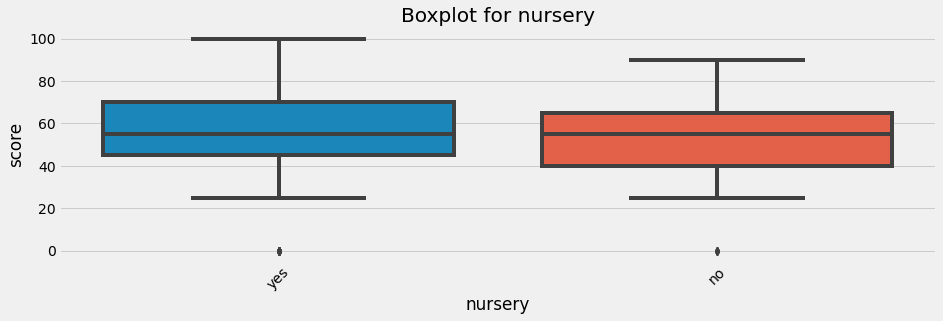

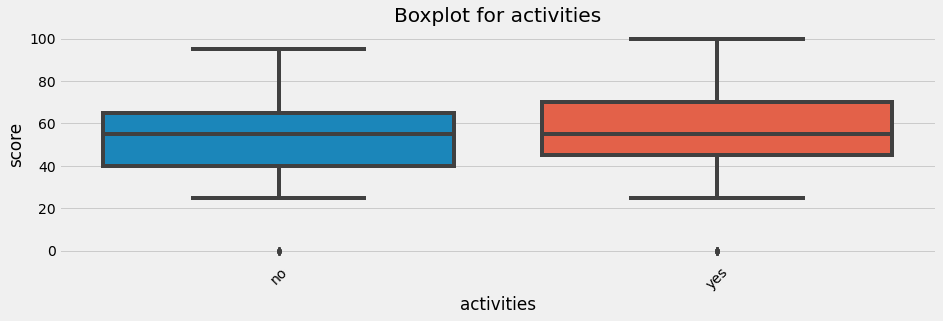

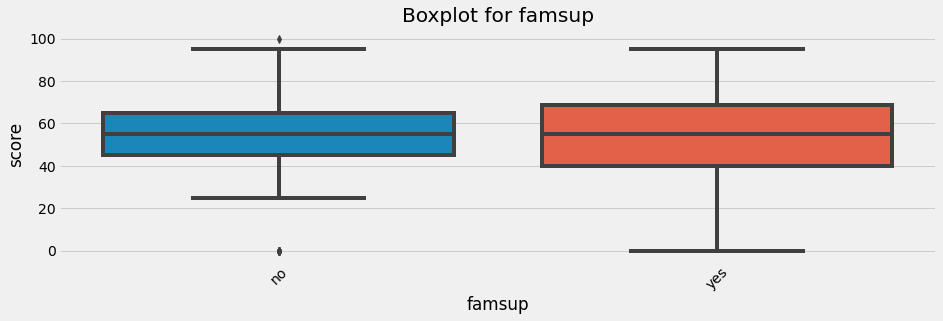

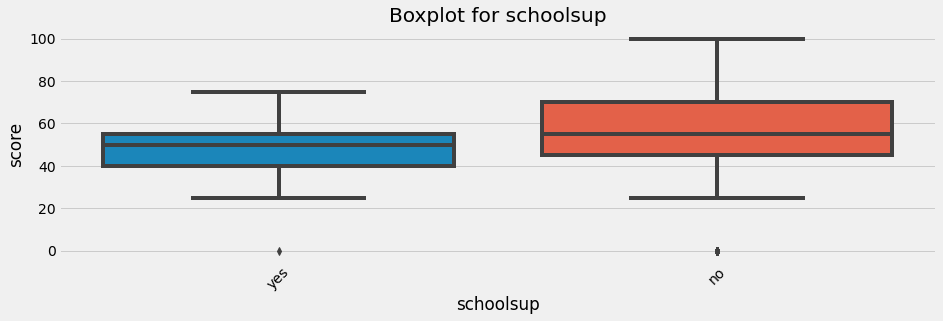

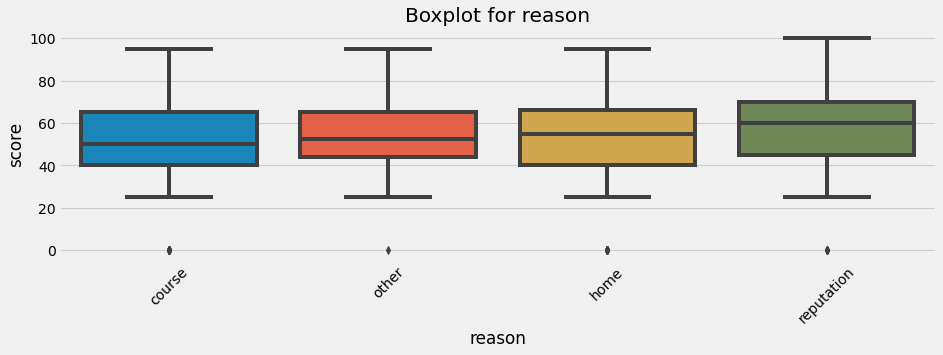

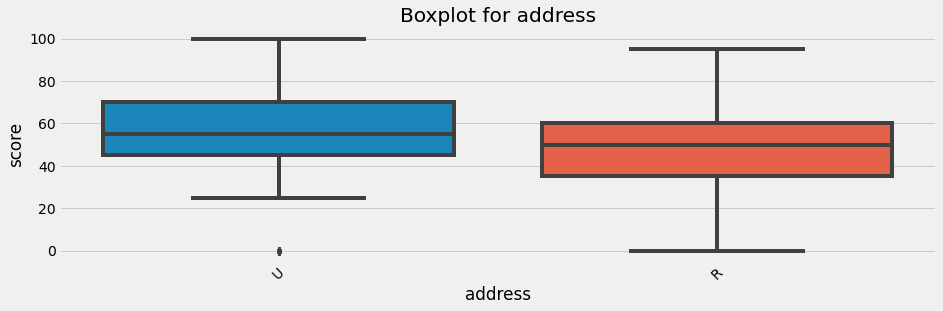

In [41]:
for col in ['school', 'famsize', 'paid', 'internet', 'romantic', 'higher', 'nursery', 'activities', 'famsup', 'schoolsup', 'reason', 'address']:
    get_boxplot(col)

Посмотрим несколько признаков по группам, хотя из boxplot видно, что только higher влияет на score. Как видим, мальчики в среднем учаться лучше чем, девочки. Ученики в отношениях учаться немного хуже, а так же те, которые без интернета и совместное или раздельное проживание родителей. Но в общем сильной разницы показатели влияния не оказывают. Кроме того, многие номинативные параметры принимают только 2 значения, при этом одно значение значительно превышает второй и соответственно, практически не влияет на score.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128cacb50>],
      dtype=object)

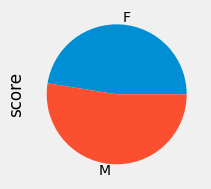

In [42]:
# успеваемость у мужчин немного выше, чем женщин
stud_math.groupby('sex')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128eee1c0>],
      dtype=object)

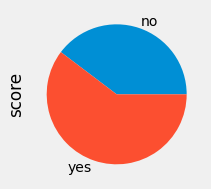

In [43]:
# желание в ВУЗ влияет на успеваемость, хотя если таких желающих большинство, то нет
stud_math.groupby('higher')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1292c3760>],
      dtype=object)

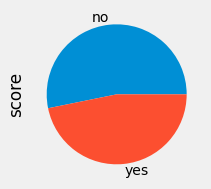

In [44]:
# ученики в отношениях учаться в среднем немного хуже
stud_math.groupby('romantic')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

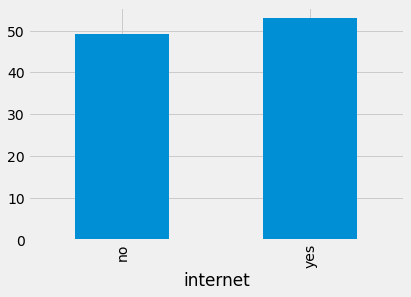

In [45]:
# наличие интернета немного улучшает успеваемость
stud_math.groupby('internet')['score'].agg('mean').plot.bar()

Рассмотрим ниже все номинативные параметры детальнее и степень их влияния на score.

### Pstatus

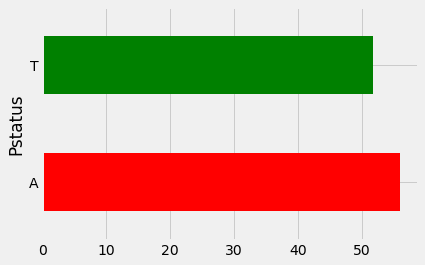

In [46]:
# ученики у кого родители живут раздельно, учаться немного лучше, но скорее всего просто таких родителей больше.
stud_math.groupby('Pstatus')['score'].agg('mean').plot(kind='barh', legend=False, color=['r', 'g'])

In [47]:
# во всем датасете - большинство родителей живущих раздельно, думаю этот признак вообще можно убрать из анализа.
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,296
A,32


### paid

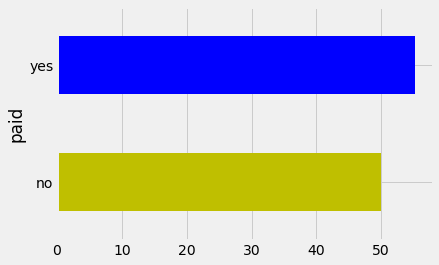

In [48]:
stud_math.groupby('paid')['score'].agg('mean').plot(kind='barh', legend=False, color=['y', 'b'])

In [49]:
# paid - одинаково, оставляем.
pd.DataFrame(stud_math.paid.value_counts())

,paid
no,189
yes,139


### absences

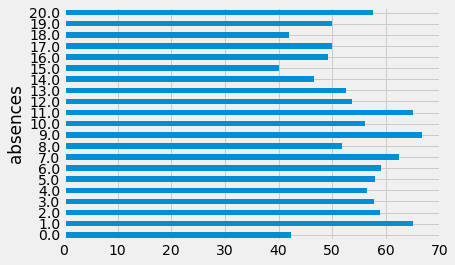

In [50]:
# даже пропуски заметно не влияют на успеваемость.
stud_math.groupby('absences')['score'].agg('mean').plot(kind='barh', legend=False)

### address

In [51]:
# посмотрим что в данном столбце, тоже адресов U в целом значительно больше, поэтому убираем.
pd.DataFrame(stud_math.address.value_counts())

,address
U,273
R,78


### school

In [52]:
# посмотрим что в данном столбце, тоже школ GP в целом больше и поэтому успеваемость выше, поэтому убираем.
pd.DataFrame(stud_math.school.value_counts())

,school
GP,322
MS,44


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ab52100>],
      dtype=object)

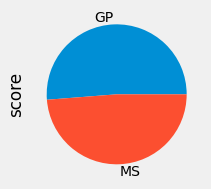

In [53]:
stud_math.groupby('school')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

### famsize

In [54]:
# оставляем
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,245
LE3,99


### guardian

In [55]:
# удаляем
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,229
father,83
other,24


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b633340>],
      dtype=object)

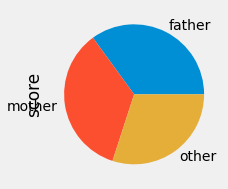

In [56]:
stud_math.groupby('guardian')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

### schoolsup

In [57]:
# удаляем, школа в основном не поддерживает 
pd.DataFrame(stud_math.schoolsup.value_counts())

,schoolsup
no,310
yes,47


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b6998e0>],
      dtype=object)

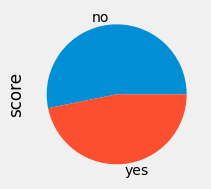

In [58]:
stud_math.groupby('schoolsup')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

### famsup

In [59]:
# оставляем, семья в основном поддерживает
pd.DataFrame(stud_math.famsup.value_counts())

,famsup
yes,204
no,127


### activities

In [60]:
# оставляем
pd.DataFrame(stud_math.activities.value_counts())

,activities
yes,184
no,168


### nursery

In [61]:
# удаляем, в дет.сад ходили почти все.
pd.DataFrame(stud_math.nursery.value_counts())

,nursery
yes,277
no,73


### higher

In [62]:
# оставляем, хоть явное большинство хотят в ВУЗ, интересно посмотреть что получили те, кто не хочет.
pd.DataFrame(stud_math.higher.value_counts())

,higher
yes,332
no,16


In [92]:
# посмотрим 16 строк.
score_higher_no = stud_math.loc[stud_math['higher'] == 'no']
score_higher_no

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,NaN,course,mother,NaN,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
163,GP,M,17,U,GT3,T,1.0,3.0,at_home,services,course,father,1.0,1.0,0.0,no,no,no,NaN,yes,-3.0,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
165,GP,M,16,U,GT3,T,3.0,2.0,services,services,course,mother,2.0,1.0,1.0,no,yes,no,yes,no,-3.0,no,no,no,4.0,5.0,2.0,2.0,16.0,60.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,16.000000,15.000000,16.000000,15.000000,16.000000,15.000000,15.000000,15.000000,16.00000,14.000000,16.000000,16.000000
mean,17.812500,1.933333,1.625000,1.733333,1.437500,1.200000,4.000000,3.666667,3.25000,3.357143,4.437500,34.687500
std,1.515201,1.032796,0.885061,0.961150,0.512348,1.264911,0.755929,0.975900,1.48324,1.446861,6.602714,25.460345
min,16.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.00000,1.000000,0.000000,0.000000
25%,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.500000,3.000000,2.00000,2.000000,0.000000,0.000000
50%,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.00000,3.000000,2.000000,42.500000
75%,18.250000,2.500000,2.000000,2.000000,2.000000,2.500000,4.500000,4.500000,5.00000,5.000000,4.000000,52.500000
max,22.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.00000,5.000000,20.000000,65.000000


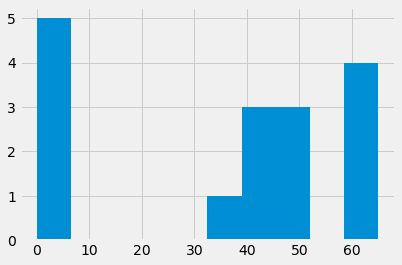

In [64]:
# Гистограмма score в score_higher_no.
score_higher_no.score.hist()
score_higher_no.describe()

вывод по higher - что ученики ответившие no - из 16 больше 40 набрали 7 человека - этот столбец тоже можно удалить. Потому что 16 это не большинство из 92 Fail учеников, да и оценки присутствуют почти все.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b7a3ca0>],
      dtype=object)

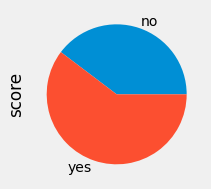

In [65]:
stud_math.groupby('higher')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

### internet

In [66]:
# удаляем, отсутствие интернета не влияет на успеваемость
pd.DataFrame(stud_math.internet.value_counts())

,internet
yes,279
no,55


In [67]:
# посмотрим 55 строк без интернета
score_internet_no = stud_math.loc[stud_math['internet'] == 'no']
score_internet_no

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,M,18,R,GT3,T,1.0,3.0,at_home,NaN,course,NaN,2.0,2.0,0.0,no,yes,yes,no,NaN,yes,no,no,3.0,3.0,4.0,3.0,4.0,50.0
370,MS,F,19,U,LE3,T,3.0,2.0,services,services,home,other,2.0,2.0,2.0,no,no,no,yes,yes,yes,no,yes,3.0,2.0,2.0,3.0,4.0,45.0
372,MS,F,17,NaN,GT3,T,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,no,no,no,yes,yes,yes,no,NaN,3.0,4.0,3.0,3.0,8.0,55.0
383,MS,M,19,R,GT3,T,1.0,1.0,other,services,other,mother,2.0,1.0,1.0,no,no,no,no,NaN,yes,no,no,4.0,3.0,2.0,5.0,0.0,0.0


In [68]:
# score тоже разный, удаляем, отсуствие интернета не влияет на score.
pd.DataFrame(score_internet_no.score.value_counts())

,score
50.0,9
60.0,7
0.0,6
55.0,6
45.0,5
70.0,4
65.0,4
35.0,3
30.0,3
90.0,2


### romantic

In [93]:
# оставляем
pd.DataFrame(stud_math.romantic.value_counts())

,romantic
no,240
yes,124


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c00a250>],
      dtype=object)

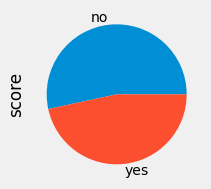

In [94]:
# ожидаемо, количественно учеников без отношений больше и поэтому успеваемость чуть выше.
stud_math.groupby('romantic')['score'].agg('mean').plot.pie(subplots=True,figsize=(8, 3))

In [97]:
# Удалим столбцы, обговоренные выше и создадим новый датасет
stud_math_new = stud_math.drop(['school', 'address', 'Pstatus', 'guardian', 'schoolsup', 'nursery', 'higher', 'internet'], axis = 1)
stud_math_new

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,famsup,paid,activities,romantic,famrel,freetime,goout,health,absences,score
0,F,18,NaN,4.0,4.0,at_home,teacher,course,2.0,2.0,0.0,no,no,no,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,GT3,1.0,1.0,at_home,other,course,1.0,2.0,0.0,yes,no,no,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,LE3,1.0,1.0,at_home,other,other,1.0,2.0,3.0,no,NaN,no,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,GT3,4.0,2.0,health,NaN,home,1.0,3.0,0.0,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,GT3,3.0,3.0,other,other,home,1.0,2.0,0.0,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,2.0,2.0,services,services,course,1.0,2.0,2.0,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,M,17,LE3,3.0,1.0,services,services,course,2.0,1.0,0.0,no,no,no,no,2.0,4.0,5.0,2.0,3.0,80.0
392,M,21,GT3,1.0,1.0,other,other,course,1.0,1.0,3.0,no,no,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,M,18,LE3,3.0,2.0,services,other,course,3.0,1.0,0.0,no,no,NaN,no,4.0,4.0,1.0,5.0,0.0,50.0


In [100]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
def get_stat_dif(column):
    cols = stud_math_new.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math_new.loc[stud_math_new.loc[:, column] == comb[0], 'score'],
                     stud_math_new.loc[stud_math_new.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['famsize', 'Mjob', 'Fjob', 'famsup', 'paid', 'activities', 'romantic', 'reason', 'goout']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Как видим серьезно отличаются только Mjob.

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

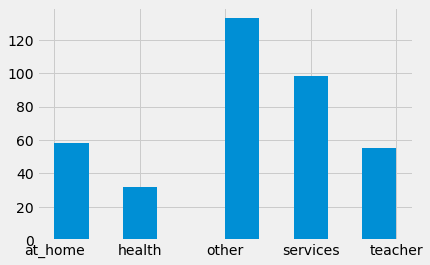

In [101]:
stud_math.Mjob.hist()
stud_math.Mjob.describe()

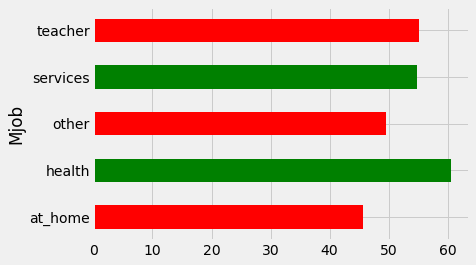

In [103]:
# ученики у кого мамы работают, учаться  лучше.
stud_math.groupby('Mjob')['score'].agg('mean').plot(kind='barh', legend=False, color=['r', 'g'])

In [104]:
pd.DataFrame(stud_math.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров учеников на успеваемость по математике получены следующие выводы:

В данных достаточно мало пустых значений. Смысла замены NaN на None - я не увидела, хотя теорию прочитала, не смотря на это я попробовала применять этот метод в данном анализе.
Выбросы найдены только в столбцах absences, Fedu and famrel и то в последних двух логически рассуждая, выбросы заменены на другие значения. Что позволяет сделать вывод о том, что данные достаточно чистые.
Анализ номинативных значений состоящих из 2 переменых в большинстве привели к выводу, что влияния они на score не оказывают и для моделировая могут быть удалены из анализа. 
В целом, я нашла полезным разделить данные на 2 группы по score - Fail & Pass и сравнить их между собой. Учеников с проходным баллом, больше чем, провалившихся.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Mjob.